# Example for Lift Analysis

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%aimport wingstructure
%matplotlib inline
from matplotlib import pyplot as plt
from wingstructure import data, analysis
import numpy as np

## Definition of wing

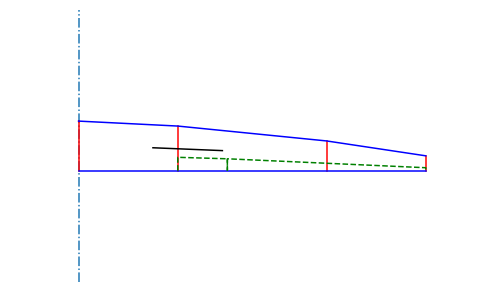

In [3]:
span_positions = [0, 2, 5, 7]
chord_lengths = [1, 0.9, 0.6, 0.3]
offsets = [0, 0.1, 0.4, 0.7]
twists = [0]*4

twists2 = [0, 0, np.deg2rad(-1), np.deg2rad(-2)]

plt.figure(figsize=(8,5))

wing = data.geometry.Wing()
for ii in range(len(span_positions)):
    wing.add_section(data.geometry.Point(offsets[ii], span_positions[ii],0.0),chord_lengths[ii], twists[ii])
wing.set_root_pos(0.0)
wing.set_airbrake(1.5,2.9)
wing.set_flap('flap', 2, 3,[0.7,0.7])
wing.set_flap('flap2', 3, 7, [0.7,0.8])

wing.plot()
plt.savefig('wing.png')

## Define analysis object and calculate distributions

/home/jonathan/Programmieren/wingstructure/wingstructure/analysis.py:33: UserWarning: No airfoil database defined, using default airfoil.
  warn('No airfoil database defined, using default airfoil.')


[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.01871573 0.01871573 0.01871573 0.01871573
 0.01871573 0.01871573 0.01871573 0.01067844 0.01067844 0.01067844
 0.01871573 0.01871573 0.01871573 0.01871573 0.01871573 0.01871573
 0.01871573 0.01871573 0.01871573 0.01871573 0.01871573 0.01871573
 0.01871573 0.01871573 0.01871573 0.01871573 0.01871573 0.01871573
 0.01871573 0.01871573 0.01871573 0.01871573 0.01871573 0.01871573
 0.01871573 0.01871573 0.01871573]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.       

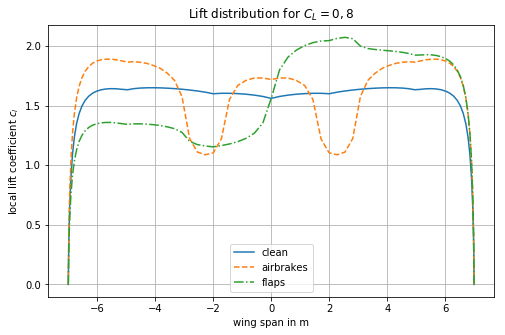

In [4]:
liftana = analysis.LiftAnalysis(wing)

span_pos = liftana.calc_ys

α, distribution, C_Dib = liftana.calculate(C_L=0.8, return_C_Di=True)
α_qr, distribution_q, C_Dia = liftana.calculate(C_L=0.8, 
            flap_deflections={'flap2': [5, -5]}, return_C_Di=True)
α_ab, distribution_ab, C_Di = liftana.calculate(C_L=0.8, air_brake=True, return_C_Di=True)

plt.figure(figsize=(8,5))
plt.plot(span_pos, distribution, label='clean')
plt.plot(span_pos, distribution_ab, '--', label='airbrakes')
plt.plot(span_pos, distribution_q, '-.', label='flaps')
plt.xlabel('wing span in m')
plt.ylabel('local lift coefficient $c_l$')
plt.title('Lift distribution for $C_L = 0,8$')
plt.grid()
plt.legend()
plt.savefig('Liftdistribution.png')
plt.savefig('Liftdistribution.pdf')

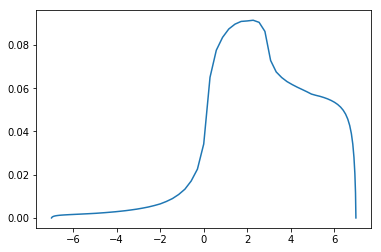

In [5]:
plt.plot(liftana.calc_ys,liftana.flap_liftdist['flap2'])

In [9]:
wing.flaps['flap'].chordpos_at(liftana.calc_ys)

array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0.7, 0.7, 0.7, 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ])

In [14]:
α, α_qr

(16.38229225677693, 16.38229225677693)

In [28]:
C_Dib, C_Dia, C_Di

(0.42939250151312297, 0.42944146209636813, 0.5923572795318769)

In [29]:
liftana.base_drag

0.0

In [30]:
liftana.aoa_C_Di

0.5367406268914037